# Demo: version 11

# Data science and Data engineering workflow

The idea is to show how a Data science (DS) team can work with autodeploy. Later,
how a Data engineering (DE) team can gather this insight and metadata to deploy 
a workflow to start making predictions in production.

1. The DS team deploys its workflows to see if everything runs as expected (in order to get the final model).

2. The DE needs some steps of those workflows in order to put the model in production.

3. Autodeploy will check their workflows over time to raise alerts if something goes wrong.


News: 

- Integration between tracking and checking.
- Interface that provides an easy integration with new plugins.

In [1]:
from IPython.display import Image
Image("pictures/autodeploy.png", width=800, height=800)

In [3]:
from IPython.display import Image
Image("pictures/autodeploy_usecase8.png", width=800, height=800)

# Data science team

1. Build the workflows (build images)
2. Start the worklfows (start containers)
3. Run the workflows (run the python files on the containers)

##  Problem: Clasify leaf specimens

This data set consists of a collection of features that measure shape and texture extracted from digital images of leaf specimens from a total of 40 different plant species. It was collected in February 2014 at the Faculty of Science, Universidade do Porto, Portugal.https://archive.ics.uci.edu/ml/datasets/leaf

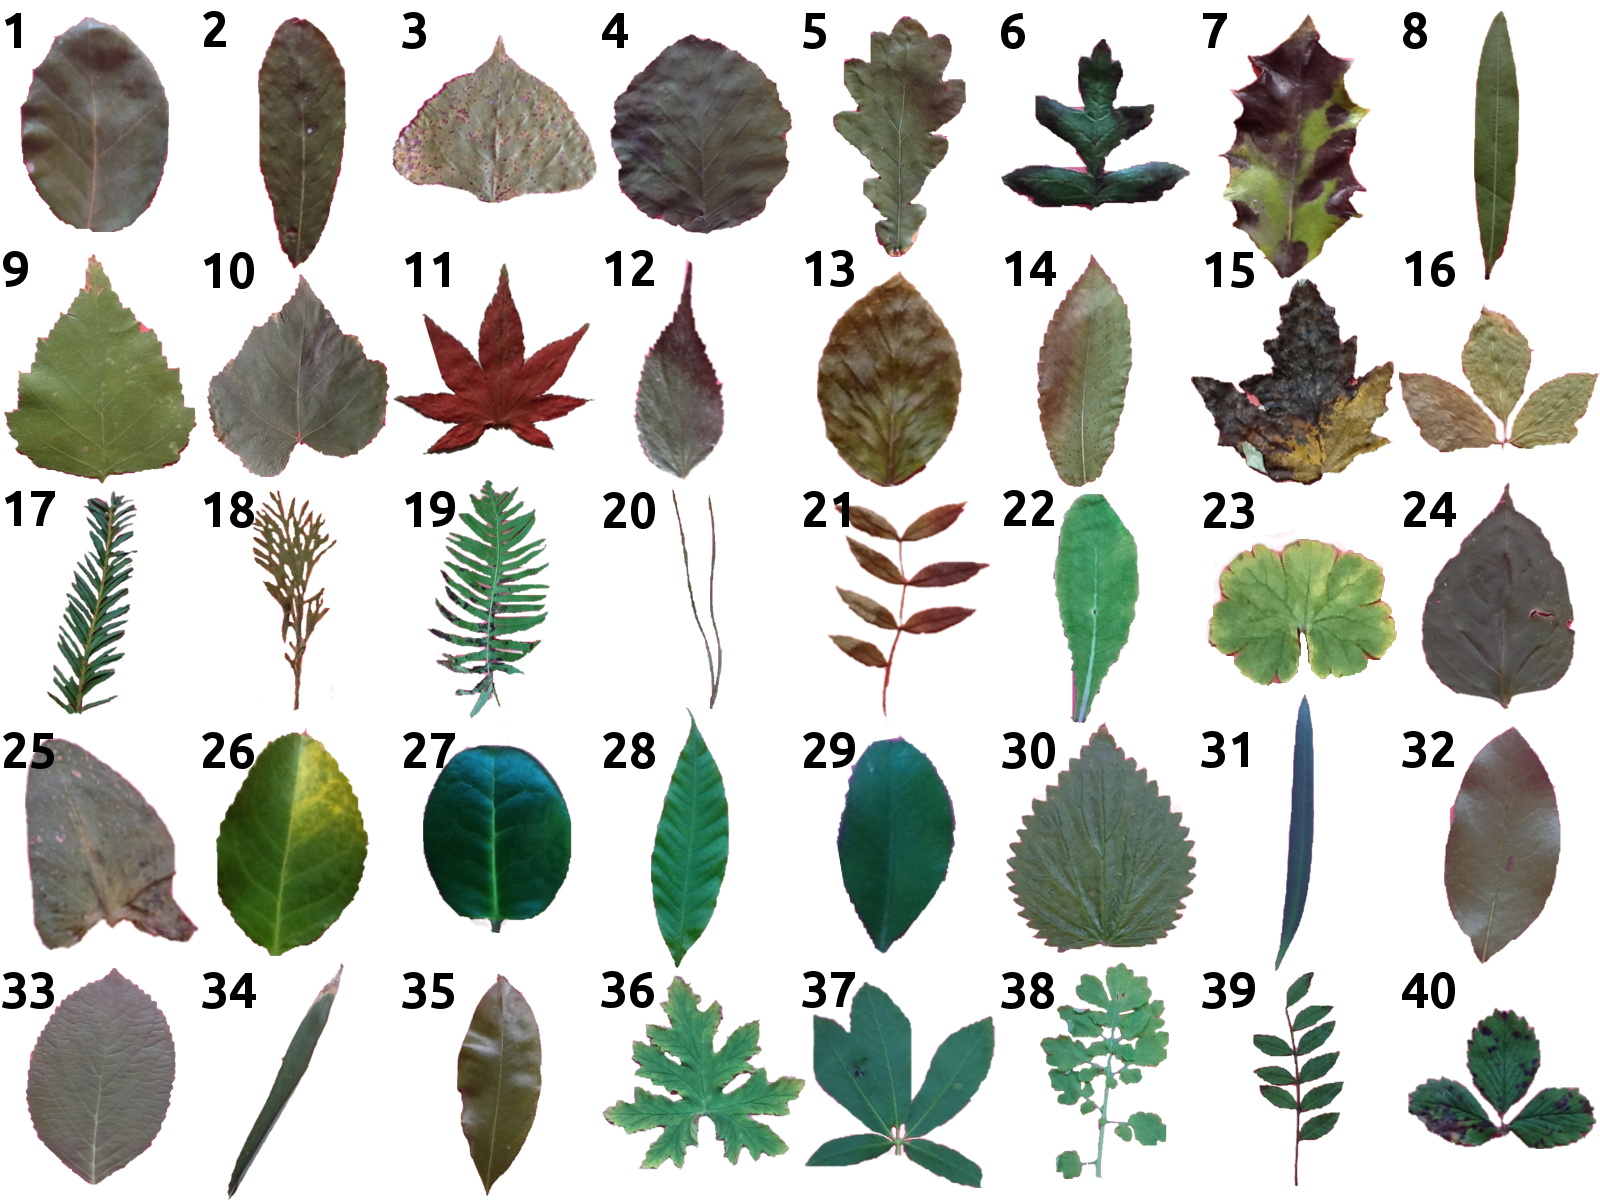

In [2]:
from IPython.display import Image
Image("plants.png", width=400, height=400)

## Build, start and run workflows

Build, start and run each environment inside each workflow


In [2]:
%%time

from autodeploy.setup import setup
from autodeploy.run import run

# App folder
app_dir = '/home/guess/Desktop/autodeploy/examples/demo2/data-science/'

# Workflows

# This workflow1 will gather and preprocess the raw data set. Order matters.
workflow1 = [
    {'name': 'gathering', 
     'file': 'gathering.py', 
     'parameters': {'raw_data_path': 'leaf.csv',
                    'percentage': 1.0},
     'dockerfile': 'Dockerfile_gathering'}, # Provides a dockerfile
    
    {'name': 'preprocessing',
     'file': 'preprocessing.py', 
     'requirements': 'req_preprocessing.txt'}, # Convert requirements.txt to dockerfile

]

# This workflow2 will model preprocess data set.
workflow2 = [
    {'name': 'modeling',
     'file': 'modeling.py', 
     'parameters': {'preprocessed_data': 'preprocessed_data.csv',
                    'model_path': 'models',
                    'n_estimators': 10},
     'requirements': 'req_modeling.txt'}, # Convert requirements.txt to dockerfile
    {'name': 'modeling2',
     'file': 'modeling.py', 
     'parameters': {'preprocessed_data': 'preprocessed_data.csv',
                    'model_path': 'models2',
                    'n_estimators': 20},
     'requirements': 'req_modeling.txt'},
    
]

workflows = [
    {'name': 'workflow1', 'workflow': workflow1, 
     'tracker': {'port': 8001}},
    {'name': 'workflow2', 'workflow': workflow2, 
     'tracker': {'port': 8002}, 'parallel': True}
   
]

workflow_datascience = setup.Setup(app_dir, workflows, verbose=False)

# This will build and start the environments
workflow_datascience.run_pipeline()

# Read the platform and workflows
runner = run.Run(workflow_datascience, verbose=True)

# Run the workflow
runner.run_workflows()

11-Feb-20 11:52:21 -  INFO - [++] Running workflow: [workflow1].
11-Feb-20 11:52:21 -  INFO - [+] Running env: [workflow1:gathering].
11-Feb-20 11:52:22 -  INFO - [+] Running (gathering.py). 
11-Feb-20 11:52:22 -  INFO - [+] Output:     species  specimen_number  eccentricity  ...  third_moment  uniformity  entropy
0        1                1       0.72694  ...      0.005232    0.000275  1.17560
1        1                2       0.74173  ...      0.002708    0.000075  0.69659
2        1                3       0.76722  ...      0.000921    0.000038  0.44348
3        1                4       0.73797  ...      0.001154    0.000066  0.58785
4        1                5       0.82301  ...      0.000560    0.000024  0.34214

[5 rows x 16 columns]
 
11-Feb-20 11:52:22 -  INFO - [+] Environment (gathering) finished successfully. 
11-Feb-20 11:52:22 -  INFO - [+] Running env: [workflow1:preprocessing].
11-Feb-20 11:52:23 -  INFO - [+] Running (preprocessing.py). 
11-Feb-20 11:52:23 -  INFO - [+] 

CPU times: user 146 ms, sys: 22.4 ms, total: 169 ms
Wall time: 5.25 s


In [2]:
workflow_datascience.workflows

[{'name': 'workflow1',
  'nodes': [{'name': 'gathering',
    'image': <Image: 'gathering:latest'>,
    'type': 'executor',
    'status': 0,
    'port': None},
   {'name': 'preprocessing',
    'image': <Image: 'preprocessing:latest', 'localhost:5000/preprocessing:latest'>,
    'type': 'executor',
    'status': 0,
    'port': None},
   {'name': 'tracker-workflow1',
    'image': <Image: 'tracker-workflow1:latest'>,
    'type': 'tracker',
    'status': 0,
    'port': 8001}]},
 {'name': 'workflow2',
  'nodes': [{'name': 'modeling',
    'image': <Image: 'modeling2:latest', 'modeling:latest'>,
    'type': 'executor',
    'status': 0,
    'port': None},
   {'name': 'modeling2',
    'image': <Image: 'modeling2:latest', 'modeling:latest'>,
    'type': 'executor',
    'status': 0,
    'port': None},
   {'name': 'tracker-workflow2',
    'image': <Image: 'tracker-workflow2:latest'>,
    'type': 'tracker',
    'status': 0,
    'port': 8002}]}]

In [4]:
# workflow_datascience.stop_workflows()

11-Feb-20 18:09:43 -  INFO - [+] Environment: [gathering] was stopped successfully.
11-Feb-20 18:09:43 -  INFO - [+] Environment: [preprocessing] was stopped successfully.
11-Feb-20 18:09:44 -  INFO - [+] Tracker: [tracker-workflow1] was stopped successfully.
11-Feb-20 18:09:44 -  INFO - [+] Stopped containers were pruned.
11-Feb-20 18:09:44 -  INFO - [+] Network: [network_workflow1] was stopped successfully.
11-Feb-20 18:09:44 -  INFO - [+] Removed network was pruned.
11-Feb-20 18:09:44 -  INFO - [+] Environment: [modeling] was stopped successfully.
11-Feb-20 18:09:44 -  INFO - [+] Environment: [modeling2] is not running in local.
11-Feb-20 18:09:45 -  INFO - [+] Tracker: [tracker-workflow2] was stopped successfully.
11-Feb-20 18:09:45 -  INFO - [+] Stopped containers were pruned.
11-Feb-20 18:09:45 -  INFO - [+] Network: [network_workflow2] was stopped successfully.
11-Feb-20 18:09:45 -  INFO - [+] Removed network was pruned.


With those runnings we ensure that the data science pipeline (gathering, preprocessing, modeling) is working perfectly.

# Data engineering team

- Build the predictor
- Build or read the workflows (build or read images)
- Start the worklfows (start containers)
- Run the workflows (run the python files on the containers)

## Build and run the predictor

Read predictor image from environment

In [1]:
%%time

from autodeploy.deploy import Deploy

# App folder
app_dir = '/home/guess/Desktop/autodeploy/examples/demo2/data-eng/'
model_path = '/home/guess/Desktop/autodeploy/examples/demo2/data-science/workflow/models'

# Read the platform
deployer_eng = Deploy(app_dir, verbose=True)

# Build a predictor, if there is not an image, build a new one
deployer_eng.build_predictor(image='predictor', model_path=model_path)

# Run predictor, provides name and port for the container.
deployer_eng.run_predictor(name='predictor', port=5001)

deployer_eng

11-Feb-20 18:11:12 -  INFO - [++] Building predictor [image:predictor] as API. Please wait.
11-Feb-20 18:11:12 -  WARNING - [+] Image [predictor] already exists.
11-Feb-20 18:11:12 -  INFO - [+] Predictor: predictor loaded successfully.
11-Feb-20 18:11:12 -  INFO - [++] Running predictor [predictor].
11-Feb-20 18:11:12 -  WARNING - [+] Environment: [predictor] is already running.
11-Feb-20 18:11:12 -  INFO - [+] Predictor API at [http://localhost:5001]. 


CPU times: user 1.03 s, sys: 350 ms, total: 1.38 s
Wall time: 1.27 s



Predictor = (
    Name: predictor,
    Environment(image): <Image: 'app_single_api:latest', 'predictor:latest'>,
    Container: None,
    URL=0.0.0.0:5001),

In [6]:
# deployer_eng.stop_predictor(name='predictor')

29-Jan-20 18:17:39 -  INFO - [+] Predictor: [predictor] was stopped successfully.


## Build and start workflows for predicting

In [2]:
%%time

import pandas as pd
import os

from autodeploy.check import tools
from autodeploy.setup import Setup
from autodeploy.run import Run
from autodeploy.deploy import Deploy

# App folder
app_dir = '/home/guess/Desktop/autodeploy/examples/demo2/data-eng/'

# Simulate new requests from user
df_input = pd.read_csv(os.path.join(app_dir, 'workflow', 'X_test.csv'))
df_noise = tools.add_noise(df_input, sigma=0.003) # Predictions drawn from drafted distribution
# df_noise = df_input
df_noise.to_csv(os.path.join(app_dir, 'workflow', 'new_data.csv'), index=False)

# Workflows
workflow3 = [
    {'name': 'get_new_data', 
     'file': 'get_new_data.py', 
     'parameters': {'new_data_path': 'new_data.csv'}, # new data from user
     'env': 'gathering'}, # Provides an image from repository
    
    {'name': 'preprocessing_new_data', 
     'file': 'preprocessing_new_data.py', 
     'parameters': {'output_data': 'preprocessed_data.csv'}, # Cleaned data
     'env': 'preprocessing'}
]

workflows_eng = [
    {'name': 'workflow3', 'workflow': workflow3, 'tracker': {'port': 8003}},
]

# Build and run environments (containers)
workflow_dataeng = Setup(app_dir, workflows_eng, verbose=False)
workflow_dataeng.run_pipeline()

# Read the workflows and run them
runner_eng = Run(workflow_dataeng, verbose=True)
runner_eng.run_workflows()

# Make predictions
deployer_eng = Deploy(app_dir, verbose=True)
predictions = deployer_eng.predict('preprocessed_data.csv', port=5001)

predictions.head()

/home/guess/Desktop/autodeploy/venv/lib/python3.7/site-packages/nbformat/notebooknode.py:4: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working

11-Feb-20 18:11:49 -  INFO - [++] Running workflow: [workflow3].
11-Feb-20 18:11:49 -  INFO - [+] Running env: [workflow3:get_new_data].
11-Feb-20 18:11:51 -  INFO - [+] Running (get_new_data.py). 
11-Feb-20 18:11:51 -  INFO - [+] Output:     eccentricity  aspect_ratio  elongation  ...  third_moment  uniformity   entropy
0      0.996025     10.121935    0.926917  ...      0.000282   -0.001531  0.280138
1      0.509665      1.125682    0.674982  ...     -0.004589    0.005928  0.676701
2      0.241314      1.046971    0.610543  ...      0.008621    0.004500  0.829444
3      0.866570      1.877163    0.623023  ...      0.008313   -0.001791  1.016805
4      0.831381      1.978124    0.506049  ...      0.008902   -0.004076  1.804865

[5 

CPU times: user 1.17 s, sys: 88.2 ms, total: 1.26 s
Wall time: 4.03 s


eccentricity  aspect_ratio  elongation  solidity  stochastic_convexity  \
0      0.996025     10.121935    0.926917  0.806263              0.908437   
1      0.509665      1.125682    0.674982  0.529982              0.750191   
2      0.241314      1.046971    0.610543  0.564033              0.796565   
3      0.866570      1.877163    0.623023  0.827288              0.857576   
4      0.831381      1.978124    0.506049  0.934693              0.996831   

   isoperimetric_factor  maximal_indentation_depth  lobedness  \
0              0.155795                   0.130063   2.736243   
1              0.171739                   0.129107   3.080135   
2              0.215775                   0.127901   2.849923   
3              0.329561                   0.044588   0.400831   
4              0.560322                   0.023326   0.116912   

   average_intensity  average_contrast  smoothness  third_moment  uniformity  \
0           0.012719          0.055715   -0.002500      0.000282   -0.001531   
1           0.016779          0.055811   -0.000908     -0.004589    0.005928   
2           0.033489          0.128635    0.010318      0.008621    0.004500   
3           0.038905          0.112991    0.013602      0.008313   -0.001791   
4           0.076904          0.171271    0.031041      0.008902   -0.004076   

    entropy  pred  
0  0.280138    31  
1  0.676701    11  
2  0.829444    11  
3  1.016805     5  
4  1.804865    12

Once we have the workflows (get_new_data and preprocessing) and the predictor.
We were able to make predictions from new data.

In [37]:
# workflow_dataeng.stop_workflows()

29-Jan-20 13:35:50 -  INFO - [+] Environment: [get_new_data] was stopped successfully.
29-Jan-20 13:35:50 -  INFO - [+] Environment: [preprocessing_new_data] was stopped successfully.
29-Jan-20 13:35:51 -  INFO - [+] Tracker: [tracker-workflow3] was stopped successfully.
29-Jan-20 13:35:51 -  INFO - [+] Stopped containers were pruned.
29-Jan-20 13:35:51 -  INFO - [+] Network: [network_workflow3] was stopped successfully.
29-Jan-20 13:35:51 -  INFO - [+] Removed network was pruned.


In [18]:
# runner_eng.workflows

## 4. Checkers

### Checker type = statistical (basic)

Based on non-parametric statistical tests

########## Comparing two numerical dataframes ##########

######## Kolmogorov-Smirnov test ########


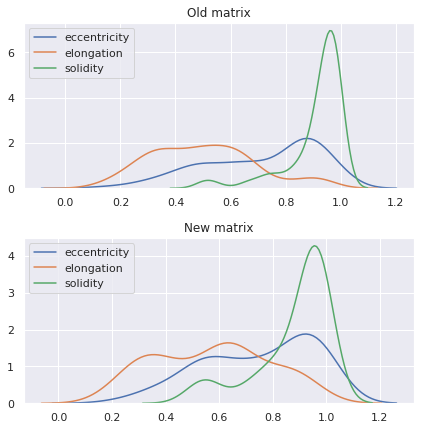

11-Feb-20 18:12:35 -  INFO - [+] Checker for file: [/home/guess/Desktop/autodeploy/examples/demo2/data-eng/ad-stuff/ad-checker/predictions/input_predictions_2020_02_11_18_11_52.csv] was run successfully.


               eccentricity elongation            solidity
p_value            0.140389  0.0019136            0.252956
explain  Slightly different  Different  Slightly different


In [4]:
import os
import pandas as pd
from autodeploy.check import Checker

app_dir = '/home/guess/Desktop/autodeploy/examples/demo2/data-eng/'
checker = Checker(app_dir, workflow_dataeng)


X_train = pd.read_csv(os.path.join(app_dir, 'workflow', 'X_train.csv'))
# X_new = predictions.loc[:, predictions.columns != 'pred']

cols = ['eccentricity', 'elongation', 'solidity']

checker.run_checker(X_train, cols=cols, checker_type='statistical', verbose=True,)



### Checker type = Deep denoise autoencoder

Based on non-parametric statistical tests

New Checker based on autoencoders:


> This model will be applied to both new data and predictions (e.g, the model predicts a high loan).

> This new checker support realtime predictions (before was batch).

> Takes into account all features at once (before we analyzed one by one).

> Non linear decision boundaries (more complex models). Before we analyzed parametric, linear comparison.

> Unsupervised model. Before was also unsupervised, but less flexible to seasonality.

## Test set with high noise

- Possible explanation 1: All your requests seem to come from a different distribution, please check your query values.
- Possible explanation 2: All your requests are not behaving as expected, please check your sensors/users queries.

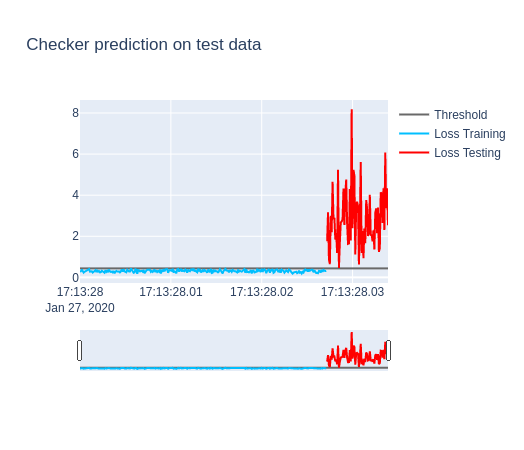

27-Jan-20 17:13:29 -  INFO - [+] Checker for file: [/home/guess/Desktop/autodeploy/examples/demo2/data-eng/ad-stuff/ad-checker/predictions/input_predictions_2020_01_27_17_13_28.csv] was run successfully.


CPU times: user 744 ms, sys: 24.6 ms, total: 769 ms
Wall time: 801 ms


In [10]:
%%time

import os
import pandas as pd
from autodeploy.check import check

app_dir = '/home/guess/Desktop/autodeploy/examples/demo2/data-eng/'
checker = check.Checker(app_dir)

X_train = pd.read_csv(os.path.join(app_dir, 'workflow', 'X_train.csv'))

checker.run_checker(X_train, checker_type='dd_autoencoder', verbose=True,)



## Test set with medium noise

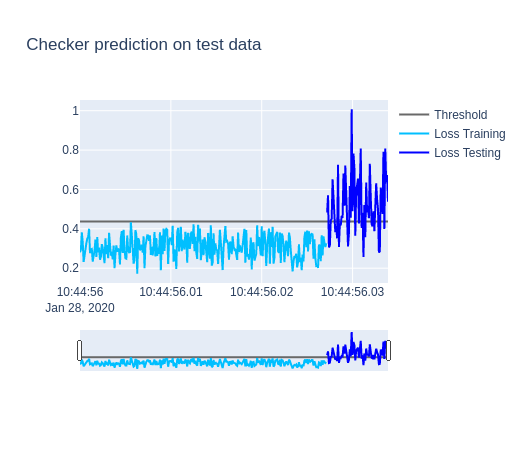

28-Jan-20 10:45:15 -  INFO - [+] Checker for file: [/home/guess/Desktop/autodeploy/examples/demo2/data-eng/ad-stuff/ad-checker/predictions/input_predictions_2020_01_28_10_44_56.csv] was run successfully.


CPU times: user 773 ms, sys: 23.4 ms, total: 797 ms
Wall time: 837 ms


In [15]:
%%time

checker.run_checker(X_train, checker_type='dd_autoencoder', verbose=True,)

## Test set with low noise

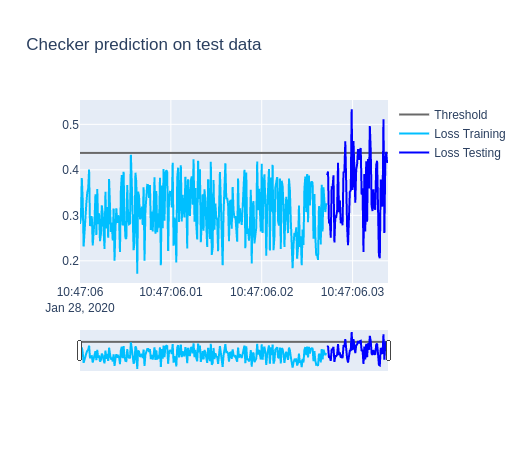

28-Jan-20 10:47:08 -  INFO - [+] Checker for file: [/home/guess/Desktop/autodeploy/examples/demo2/data-eng/ad-stuff/ad-checker/predictions/input_predictions_2020_01_28_10_47_06.csv] was run successfully.


In [27]:
checker.run_checker(X_train, checker_type='dd_autoencoder', verbose=True)

## Test set drawn from original distribution

In [2]:
checker.run_checker(X_train, checker_type='dd_autoencoder', verbose=True)

26-Jan-20 03:26:47 -  INFO - [+] Checker for file: [/home/guess/Desktop/autodeploy/examples/demo2/data-eng/ad-stuff/ad-checker/predictions/input_predictions_2020_01_26_03_25_34.csv] was run successfully.


# Dashboard preview

## Topology

Check how start up a dashboard similiar to tensorboard.

In [5]:
from IPython.display import Image
Image("dashboard1.png", width=500, height=500)


## Checker

In [6]:
from IPython.display import Image
Image("dashboard2.png", width=500, height=500)


## Swarm single node (alpha)

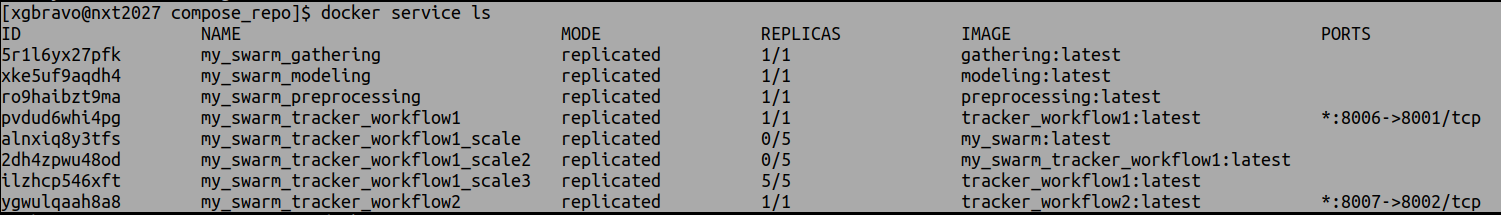

In [4]:
from IPython.display import Image
Image("swarm.png", width=900, height=900)

## Kubernetes single node (alpha)

- sudo snap install microk8s --classic --channel=1.15/stable (https://ubuntu.com/kubernetes/install)
- snap alias microk8s.kubectl kubectl
- enable dashboard: https://kubernetes.io/docs/tasks/access-application-cluster/web-ui-dashboard/
- token:token=$(sudo microk8s.kubectl -n kube-system get secret | grep default-token | cut -d " " -f1)
- token: sudo microk8s.kubectl -n kube-system describe secret $token
- sudo kubectl proxy
- sudo kompose up docker-compose.yml --volumes hostPath
- http://localhost:8001/api/v1/namespaces/kubernetes-dashboard/services/https:kubernetes-dashboard:/proxy/

In [13]:
from IPython.display import Image
Image("kubernetes.png", width=900, height=900)

# TODO

- Change track saving to a database (e.g sqlite) for thousand of experiments.
- Integration between tracking and checking.
- Refine the interface module for checking. It has to provide an easy integration with new plugins.
- Define to keep using dictionaries or functions. Function provides autocompletation of parameters.
- Plot workflows with plotly.
- check assignment of plots automatically.
- add parallel option for specific workflows (e.g, modeling with other models, check multiprocessing) [DONE]
- add option to remove tracker metadata (mlruns).
- add option to remove checker metadata (input, predictions)
- Change autodeploy.png in draw.io adding the new scheme (get_new_data) [DONE]
- Pass checker as an option, similar to tracker.
- Call all the autodeploy paths from tools [DONE]
- Change deploy module: Not need workflow_eng object [DONE]
- Pass model's path as a parameter for deploy module [DONE] 
- Change the behaviour of workflow eng, run previous steps while predictions. [DONE]
- Modify python files in data-eng: change gathering.py (remove label) [DONE]
- Implement checker as tensorflow Model class (OO) [DONE]
- Save checker model [DONE]
- Save scaler for checker model [DONE]
- Provides parameters to python files [DONE]
- Test drift distribution checker model with different configuration
- Stack drift distribution checker by using many models.
- Start formalizing the paper.
- Enhance compatibility with docker-compose
- Save workflows metadata.
- Draw workflows (topology of our architecture).
- Dashboard for checker.
- Persistence on docker volumes (a req. for remote locations)
- Status, location, metadata for each workflow
- Uses cases: compose, swarm, kubernetes with affinity.
- Swarm multiple nodes
- Test kompose with kubernetes
- Fill the documentation
- Find use cases where autodeploy can help
- Compare autodeploy with other competitors [DONE]
- Post in medium about autodeploy 
- Add a new plugin for integrity checking.
- Add option to compress all the settings needed to transfer an application.
- Add interface to write on databases.
- Add option to plot nested workflows in jupyter notebooks.

- Possible new name: from autodeploy to pysmartflow (because of pip conflict name)